<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/MLProblems_3June2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1dW4kQhSRT8ECe0ezJiVOPI3So1Qd2mxv?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# lets first generate a dataset of N points this time
np.random.seed(1)
N = 100
X = np.random.rand(N,1)*2
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(N,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 30% test set

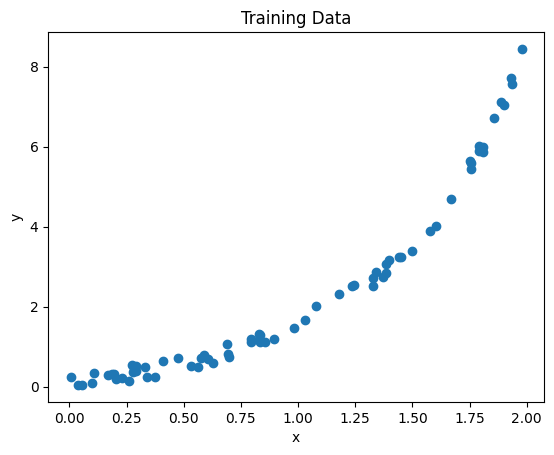

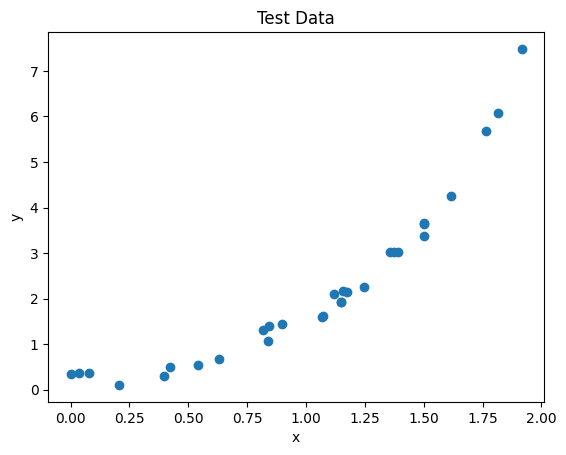

In [ ]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
#from math import log

degree = 50 # max number of number of degrees
train_scores = []
test_scores = []

for i in range(1, degree+1): # 1 to 50

    poly = PolynomialFeatures(i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    #standardization
    scaler = StandardScaler()
    scaler.fit(X_poly_train) # using parameters from training data to scale both train and test data
    X_poly_scaled_train = scaler.transform(X_poly_train)
    X_poly_scaled_test = scaler.transform(X_poly_test)

    #training
    model = LinearRegression()
    model.fit(X_poly_scaled_train, y_train)

    #prediction
    output_train = model.predict(X_poly_scaled_train)
    output_test = model.predict(X_poly_scaled_test)

    #scores stores training score of the different polynomial regression models
    train_scores.append(model.score(X_poly_scaled_train, y_train))
    test_scores.append(model.score(X_poly_scaled_test, y_test))

print("Degree corresponding to max R2 score for train data")
max_idx = np.argmax(train_scores)
print(max_idx+1, train_scores[max_idx])
print("Degree corresponding to max R2 score for test data")
max_idx = np.argmax(test_scores)
print(max_idx+1, test_scores[max_idx])

Degree corresponding to max R2 score for train data
37 0.9982282696243979
Degree corresponding to max R2 score for test data
4 0.9947829095719314


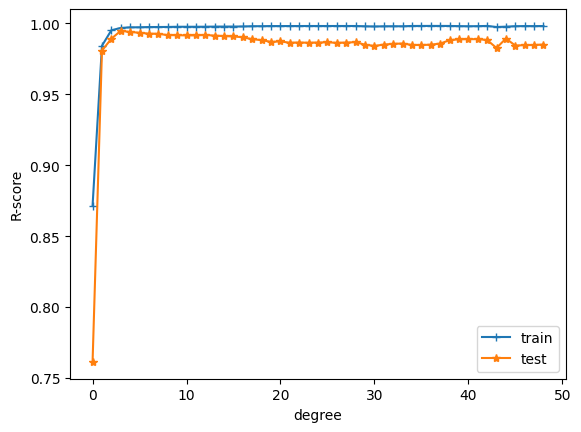

In [ ]:
plt.figure()
plt.plot(train_scores,'+-', label="train")
plt.plot(test_scores,'*-', label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
#plt.ylim((0.99,1.0))
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
degrees = 50 # number of data-points
train_scores = []
test_scores = []
for d in range(1, degrees):
    polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

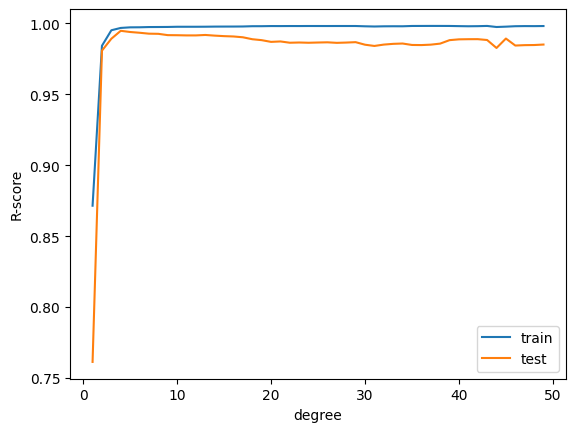

In [ ]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()